In [19]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
class Adaboost:
    
    def __init__(self, n_tree):
        self.n_tree = n_tree
        
    def fit(self, X,y,Xtest,ytest):
        count = 0
        
        self.trees = []
        self.alpha = []
        self.training_accuracy = []
        self.test_accuracy = []
        weights = np.ones(len(X))/len(X)

        while count < self.n_tree:
            count += 1
            tree = DecisionTreeClassifier(max_depth = 1)
            tree.fit(X,y,sample_weight=weights)
            preds = tree.predict(X)
            
            error = weights.dot(preds != y)
            alpha = 0.5*(np.log(1-error) - np.log(error))
            weights = np.array(weights*np.exp(-alpha*y*preds)) 
            weights = weights/weights.sum()
            
            self.trees.append(tree)
            self.alpha.append(alpha)
            self.training_accuracy.append(np.mean(self.predict(X) == y))
            self.test_accuracy.append(np.mean(self.predict(Xtest) == ytest))

    def predict(self,X):
        preds = np.concatenate([tree.predict(X).reshape(-1,1) for tree in self.trees],axis = 1)
        preds = preds.dot(np.array(self.alpha))
        return np.sign(preds)

In [24]:
mushroom_data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                              delimiter=',', header = None)

In [25]:
mushroom_data.iloc[:,0] = mushroom_data.iloc[:,0].apply(lambda x: -1 if x == 'p' else 1)

In [44]:
mushroom_data = pd.get_dummies(mushroom_data)
train = mushroom_data.sample(frac = .5)
test = mushroom_data.loc[~mushroom_data.index.isin(train.index),:]

In [45]:
Xtrain, ytrain = train.iloc[:,1:], train.iloc[:,0]
Xtest, ytest = test.iloc[:,1:], test.iloc[:,0]

In [46]:
ada = Adaboost(100)

In [47]:
ada.fit(Xtrain,ytrain,Xtest,ytest)

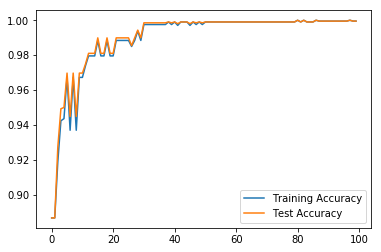

In [48]:
plt.plot(ada.training_accuracy, label = 'Training Accuracy')
plt.plot(ada.test_accuracy, label = 'Test Accuracy')
plt.legend()

In [49]:
preds = ada.predict(Xtest)

In [50]:
preds

array([-1.,  1.,  1., ...,  1.,  1., -1.])

In [52]:
np.mean(preds == ytest)

0.999507631708518